<a href="https://colab.research.google.com/github/nikhilcn-ec/Machine_learning/blob/main/Poly_regg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [ ]:
df_sal = pd.read_csv('/content/Position_Salaries.csv')
df_sal

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<ipython-input-5-2d754b325291>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


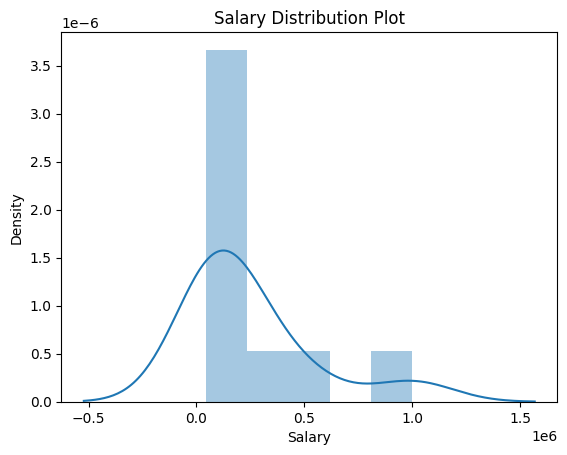

In [ ]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

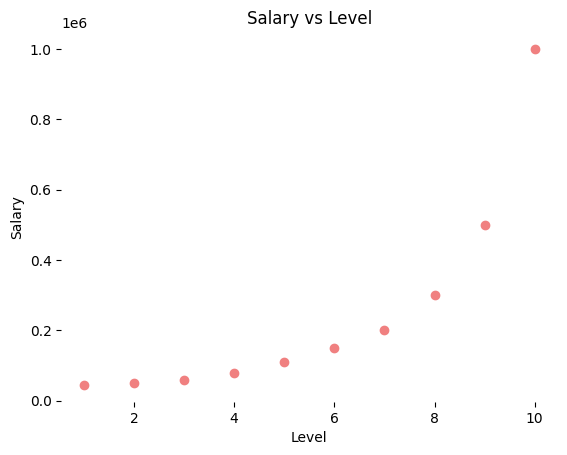

In [ ]:
# Relationship between Salary and Level
plt.scatter(df_sal['Level'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [ ]:
# Splitting variables
X = df_sal.iloc[:, 1:-1].values # independent
y = df_sal.iloc[:, -1].values # dependent

In [ ]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4)


In [ ]:
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

In [ ]:
# Predict results
y_pred_lr = lr.predict(X) # Linear Regression
y_pred_poly = lr_2.predict(X_poly) # Polynomial Regression

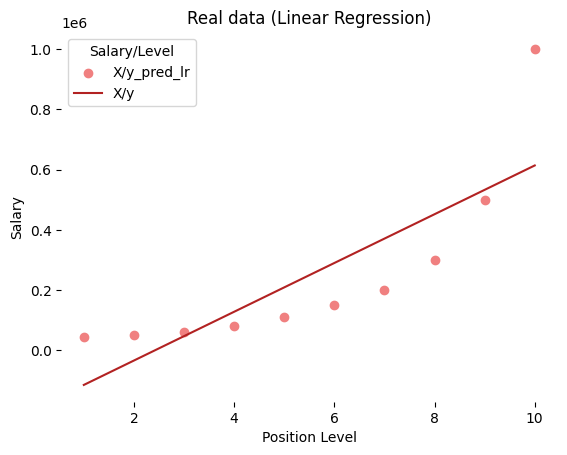

In [ ]:
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best',
facecolor='white')
plt.box(False)
plt.show()

<ipython-input-12-f333f68f623b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


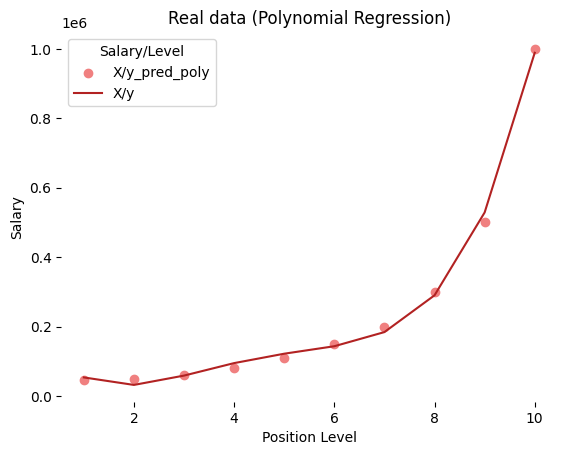

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best',
facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[6.5]])}')
# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[6.5]]))}')


Linear Regression result : [330378.78787879]
Polynomial Regression result : [158862.45265155]
